
## **Büyük Ölçekli Balık Veri Setinde ANN ve CNN ile Görüntü Sınıflandırması**🐟🦐🐠

**Veri Setinin Tanımı**

Bu çalışma, 9 farklı deniz ürünü türünü içeren büyük bir görüntü veri setini incelemektedir. Her sınıf için toplamda 1000 adet artırılmış görüntü ve bunlara karşılık gelen temel gerçekler bulunmaktadır. Veri setinde yer alan deniz ürünleri şunlardır: çipura, mercan, levrek, barbunya, istavrit, Karadeniz çaçası, çizgili barbunya, alabalık ve karides.

Görüntüler, her bir sınıf için “00000.png” ile “01000.png” arasında sıralanmış olup, modelin sınıflandırma performansını artırmak amacıyla çeşitli görüntü artırma teknikleri uygulanmıştır. Bu veri seti, derin öğrenme uygulamaları için ideal bir kaynak sunmaktadır

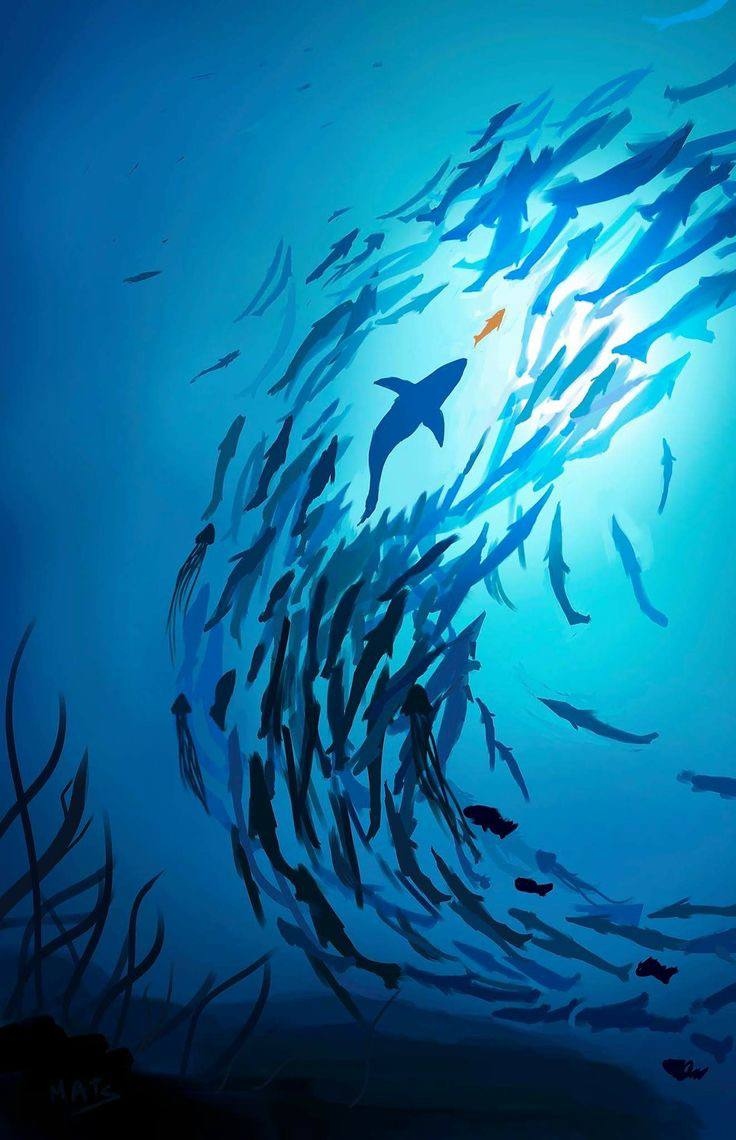

# Gerekli Kütüphanelerin İçe Aktarılması

Proje sürecinde kullanılan kütüphaneler, veri işleme, model oluşturma ve sonuçların görselleştirilmesi gibi çeşitli işlevler için kritik öneme sahiptir. Aşağıda, projemiz için gerekli olan Python kütüphanelerinin içe aktarılması sağlanmıştır

In [2]:
# Gerekli kütüphaneleri içe aktar
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from google.colab import files

# Veri Setinin İndirilmesi ve Yapılandırılması

In [21]:
#KaggleHub kütüphanesini yükle
!pip install kagglehub

In [4]:
#Veri setini indirme
import kagglehub
path = kagglehub.dataset_download("crowww/a-large-scale-fish-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2


In [6]:
fish_dir = '/root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2/Fish_Dataset/Fish_Dataset'
print(os.path.exists(fish_dir))  # Kontrol için


True


# Sınıfların Tanımlanması

In [5]:
fish_dir = '/root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2/Fish_Dataset/Fish_Dataset'
classes = [i for i in os.listdir(fish_dir) if '.' not in i]
classes

['Red Mullet',
 'Hourse Mackerel',
 'Shrimp',
 'Black Sea Sprat',
 'Trout',
 'Sea Bass',
 'Red Sea Bream',
 'Striped Red Mullet',
 'Gilt-Head Bream']

# Sınıfların Tanımlanması ve Örnek Görsellerin Gösterimi

Veri setindeki sınıfları tanımlarken, her bir balık türünden bir örnek görsel göstererek sınıfların daha iyi anlaşılmasını sağlayabiliriz. Aşağıdaki adımlar, belirli balık türlerine ait örnek görselleri yükleme ve görüntüleme işlemini içermektedir

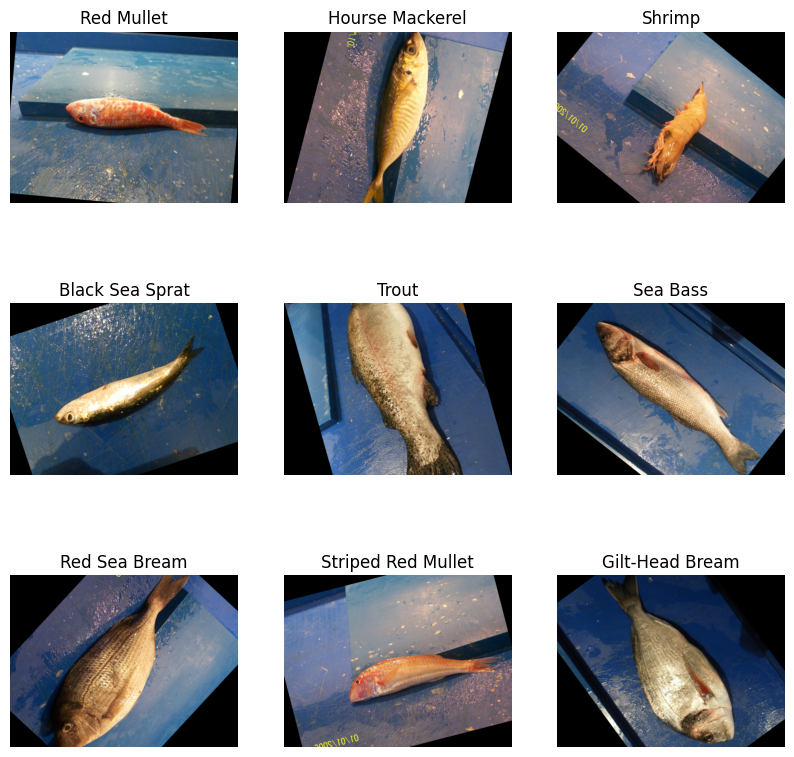

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Balık veri setinin dizin yolu
fish_dir = '/root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2/Fish_Dataset/Fish_Dataset'

# Label ve path listeleri
label = []
path = []

# Dizin içinde dolaşarak dosyaları say
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':  # Sadece .png dosyalarını kontrol et
            if 'GT' not in dir_name.split(os.sep)[-1]:  # Eğer klasör adı 'GT' içermiyorsa
                label.append(os.path.split(dir_name)[-1])  # Klasör adını label listesine ekle
                path.append(os.path.join(dir_name, filename))  # Dosya yolunu path listesine ekle

# DataFrame oluştur
data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

# Her Sınıftan(Balık Türünden) Görüntü Örnekleri Alıyoruz
cn = 0
plt.figure(figsize=(10,10))
for unique_label in data['label'].unique():
    plt.subplot(3, 3, cn+1)
    plt.imshow(plt.imread(data[data['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    cn += 1
plt.show()

# Veri Setinin Yüklenmesi ve Sınıfların Sayılması

Bu adımda, indirilen balık veri setinin dizininde bulunan görsel dosyalarını inceleyip, etiketleri ve yolları bir DataFrame’e ekliyoruz. Ardından, her sınıf için dosya sayısını hesaplayarak kullanıcıya sunuyoruz.

In [7]:
import os
import pandas as pd

# İndirilen veri setinin dizin yolu
fish_dir = '/root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2/Fish_Dataset/Fish_Dataset'

# Label ve path listeleri
label = []
path = []

# Dizin içinde dolaşarak dosyaları say
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':  # Sadece .png dosyalarını kontrol et
            if 'GT' not in dir_name.split(os.sep)[-1]:  # Eğer klasör adı 'GT' içermiyorsa
                label.append(os.path.split(dir_name)[-1])  # Klasör adını label listesine ekle
                path.append(os.path.join(dir_name, filename))  # Dosya yolunu path listesine ekle

# DataFrame oluştur
data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

# Sınıf isimleri ve miktarlarını sayma
class_counts = data['label'].value_counts()

# Sonuçları yazdır
print("Toplam Dosya Sayısı:", len(data))
print("Sınıf İsimleri ve Miktarları:")
print(class_counts)

Toplam Dosya Sayısı: 9000
Sınıf İsimleri ve Miktarları:
label
Red Mullet            1000
Hourse Mackerel       1000
Shrimp                1000
Black Sea Sprat       1000
Trout                 1000
Sea Bass              1000
Red Sea Bream         1000
Striped Red Mullet    1000
Gilt-Head Bream       1000
Name: count, dtype: int64


# Veri Hazırlama Ayarları

Bu bölümde, görüntü verilerinin işlenebilmesi için gerekli ayarlar yapılmaktadır. İlk olarak, görüntü boyutları ve batch boyutu tanımlanır. Görüntü boyutları, modelin giriş katmanına uygun hale getirilmesi için 224x224 piksel olarak ayarlanmıştır. Ayrıca, her seferinde işlenecek görüntü sayısını belirleyen batch boyutu 32 olarak belirlenmiştir.

In [8]:
# Veri hazırlama ayarları
batch_size = 32
img_height = 224
img_width = 224


Veri seti, eğitim ve doğrulama alt kümelerine ayrılmaktadır. Bu işlem, modelin eğitim sürecinde kullanılan verinin yanı sıra, modelin performansını değerlendirmek amacıyla doğrulama verisinin de sağlanmasını amaçlamaktadır. Eğitim verileri, modelin öğrenme sürecine katılırken, doğrulama verileri modelin ne kadar başarılı olduğunu görmek için kullanılır Veri hazırlama işlemleri, ImageDataGenerator sınıfı ile gerçekleştirilir. Bu sınıf, görüntüleri 0-1 aralığında ölçeklendirerek, modelin daha iyi öğrenmesini sağlar. Veri setinin %20’si, doğrulama için ayrılarak eğitim sürecinde kullanılacak veri kümesi oluşturulur.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri üreticileri ile veri hazırlama
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # %20 veri doğrulama için
)

In [10]:
# Eğitim verileri
train_generator = train_datagen.flow_from_directory(
    directory=fish_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Doğrulama verileri
validation_generator = train_datagen.flow_from_directory(
    directory=fish_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# Sınıf sayısını kontrol et
num_classes = len(train_generator.class_indices)  # Doğru sınıf sayısını kontrol et
print("Sınıf Sayısı:", num_classes)

Found 14400 images belonging to 9 classes.
Found 3600 images belonging to 9 classes.
Sınıf Sayısı: 9


Bu veriler, modelin eğitim ve doğrulama sürecinin sağlam bir temele oturduğunu gösteriyor. Eğitim için yeterli veri sağlanmış ve doğrulama seti ile modelin genel performansını değerlendirmek için uygun bir yapı oluşturulmuş. Eğitim ve doğrulama setlerindeki sınıf sayısının aynı olması, modelin her sınıf için dengeli bir öğrenme süreci geçireceği anlamına gelir

# Yapay Sinir Ağı (ANN) Modeli Oluşturma

Modeli oluşturmak için TensorFlow ve Keras kütüphanelerinden faydalanıyorum. İlk olarak, giriş katmanını tanımlıyorum. Giriş katmanı, görüntülerin boyutlarını belirtiyor. Ardından, görüntüyü 3D’den 1D vektöre dönüştürmek için bir Flatten katmanı ekliyorum.

Modelin Eğitilmesi

Modelin eğitim süresi için epoch sayısını 5 olarak belirliyorum. Daha derin öğrenme sağlamak için epoch sayısını artırabilirim.Süre 3 saati geçtiği içi bu projem için 5 olarak seçtim. GPU kullanımını sağlamak amacıyla tf.device('/GPU:0') ifadesini ekliyorum. Model, eğitim ve doğrulama verileri ile fit yöntemi kullanılarak eğitiliyor.

In [1]:
!pip install tensorflow==2.9.0 keras==2.9.0

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ANN Modeli oluşturma
model_ann = keras.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),  # Giriş katmanı
    layers.Flatten(),  # 3D görüntüyü 1D vektöre çevirir
    layers.Dense(1024, activation='relu'),  # İlk yoğun katman (512'den daha büyük)
    layers.Dropout(0.5),  # Overfitting'i önlemek için dropout
    layers.Dense(512, activation='relu'),  # İkinci yoğun katman
    layers.Dropout(0.5),  # İkinci dropout katmanı
    layers.Dense(256, activation='relu'),  # Üçüncü yoğun katman
    layers.Dropout(0.5),  # Üçüncü dropout katmanı
    layers.Dense(128, activation='relu'),  # Dördüncü yoğun katman
    layers.Dense(num_classes, activation='softmax')  # Çıkış katmanı
])

# Modeli derleme
model_ann.compile(
    optimizer='adam',  # Optimizasyon algoritması
    loss='categorical_crossentropy',  # Kayıp fonksiyonu
    metrics=['accuracy']  # Başarı metriği
)

# Model özetini yazdırma
model_ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 1024)              154141696 
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)              

In [17]:
# Modelin eğitilmesi
epochs = 5  # Eğitim döngü sayısını artırarak daha derin öğrenme sağlanabilir
with tf.device('/GPU:0'):  # GPU kullanımı
    history = model_ann.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator
    )

Epoch 1/5
450/450 [==============================] - 657s 1s/step - loss: 2.1734 - accuracy: 0.1548 - val_loss: 2.1992 - val_accuracy: 0.1106
Epoch 2/5
450/450 [==============================] - 649s 1s/step - loss: 2.1401 - accuracy: 0.1641 - val_loss: 2.2039 - val_accuracy: 0.1108
Epoch 3/5
450/450 [==============================] - 656s 1s/step - loss: 2.1190 - accuracy: 0.1673 - val_loss: 2.2094 - val_accuracy: 0.1111
Epoch 4/5
450/450 [==============================] - 665s 1s/step - loss: 2.1103 - accuracy: 0.1685 - val_loss: 2.2144 - val_accuracy: 0.1111
Epoch 5/5
450/450 [==============================] - 658s 1s/step - loss: 2.0997 - accuracy: 0.1690 - val_loss: 2.2182 - val_accuracy: 0.1111


In [18]:
# Modeli değerlendirme
loss, accuracy = model_ann.evaluate(validation_generator)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

113/113 [==============================] - 62s 546ms/step - loss: 2.2182 - accuracy: 0.1111
Validation loss: 2.2181715965270996
Validation accuracy: 0.1111111119389534


# ANN ile modelin eğitimi sonucunda elde edilen sonuçlar
Kayıp değeri oldukça yüksek ve doğruluk oranı düşük. Bu durum, modelin eğitim verileri üzerinde doğru tahminler yapmadığını gösterir. Genellikle doğruluk oranının %50’nin altında olması, modelin sınıfları öğrenmekte zorlandığını işaret eder.

# Konvolüsyonel Sinir Ağı (CNN) Modeli Oluşturma

CNN modelini oluşturmak için TensorFlow ve Keras kütüphanelerini kullanıyorum. İlk olarak, giriş katmanını tanımlıyorum; bu katman, görüntülerin boyutlarını belirtiyor. Ardından, görüntülerden özellikler çıkarmak için üç adet konvolüsyon katmanı ekliyorum. Her konvolüsyon katmanının ardından bir MaxPooling katmanı kullanarak boyutları küçültüyorum. Bu işlem, modelin daha anlamlı özellikler öğrenmesine yardımcı oluyor.

Modelin son kısmında, düzleştirme işlemi gerçekleştirilerek 3D görüntü verisi 1D vektöre dönüştürülüyor. Ardından, yoğun katmanlar eklenerek modelin öğrenme kapasitesi artırılıyor. Çıkış katmanı, softmax aktivasyon fonksiyonu kullanarak her bir sınıfa ait olasılık değerlerini hesaplıyor.

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# CNN Modeli oluşturma
model_cnn = keras.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),  # Giriş katmanı
    layers.Conv2D(32, (3, 3), activation='relu'),  # İlk konvolüsyon katmanı
    layers.MaxPooling2D(),  # İlk havuzlama katmanı
    layers.Conv2D(64, (3, 3), activation='relu'),  # İkinci konvolüsyon katmanı
    layers.MaxPooling2D(),  # İkinci havuzlama katmanı
    layers.Conv2D(128, (3, 3), activation='relu'),  # Üçüncü konvolüsyon katmanı
    layers.MaxPooling2D(),  # Üçüncü havuzlama katmanı
    layers.Flatten(),  # Veriyi düzleştirme
    layers.Dense(128, activation='relu'),  # Yoğun katman
    layers.Dropout(0.5),  # Dropout katmanı
    layers.Dense(num_classes, activation='softmax')  # Çıkış katmanı
])

# Modeli derleme
model_cnn.compile(
    optimizer='adam',  # Optimizasyon algoritması
    loss='categorical_crossentropy',  # Kayıp fonksiyonu
    metrics=['accuracy']  # Başarı metriği
)

# Model özetini yazdırma
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [20]:
# Modelin eğitilmesi
epochs = 10  # Eğitim döngüsü sayısı
with tf.device('/GPU:0'):  # GPU kullanımı
    history = model_cnn.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator
    )


Epoch 1/10
450/450 [==============================] - 2161s 5s/step - loss: 1.4049 - accuracy: 0.4705 - val_loss: 0.7709 - val_accuracy: 0.7447
Epoch 2/10
450/450 [==============================] - 2120s 5s/step - loss: 0.8818 - accuracy: 0.6726 - val_loss: 0.5897 - val_accuracy: 0.8178
Epoch 3/10
450/450 [==============================] - 2057s 5s/step - loss: 0.6704 - accuracy: 0.7480 - val_loss: 0.6163 - val_accuracy: 0.8181
Epoch 4/10
450/450 [==============================] - 2079s 5s/step - loss: 0.5253 - accuracy: 0.8051 - val_loss: 0.5291 - val_accuracy: 0.8511
Epoch 5/10
450/450 [==============================] - 2067s 5s/step - loss: 0.4022 - accuracy: 0.8490 - val_loss: 0.3518 - val_accuracy: 0.8969
Epoch 6/10
450/450 [==============================] - 2042s 5s/step - loss: 0.3200 - accuracy: 0.8844 - val_loss: 0.4252 - val_accuracy: 0.8867
Epoch 7/10
450/450 [==============================] - 2046s 5s/step - loss: 0.2739 - accuracy: 0.9012 - val_loss: 0.3349 - val_accuracy:

In [22]:
# Modeli değerlendirme
loss, accuracy = model_cnn.evaluate(validation_generator)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

113/113 [==============================] - 180s 2s/step - loss: 0.4795 - accuracy: 0.9025
Validation loss: 0.4795130789279938
Validation accuracy: 0.9024999737739563


# CNN ile modelin eğitimi sonucunda elde edilen sonuçlar

Modelimizin sonucu oldukça başarılı görünüyor:

	•	Eğitim doğruluğu (accuracy): %90.25
Model, eğitim verileri üzerinde %90.25 doğruluk oranına ulaşmış. Bu, modelin eğitim verilerinde doğru sınıflandırma yapabildiğini gösteriyor.

	•	Doğrulama doğruluğu (validation accuracy): %90.25
Model, doğrulama verileri üzerinde de %90.25 doğruluk elde etmiş. Doğrulama verisi, modelin hiç görmediği veri olduğu için bu oran modelin genelleme kabiliyetinin iyi olduğunu gösteriyor.

	•	Eğitim kaybı (loss): 0.4795

Eğitim kaybı değeri, modelin eğitim sırasında yaptığı hataların boyutunu gösterir. Daha düşük bir kayıp değeri, modelin hedefe daha yakın tahminler yaptığını ifade eder.

	•	Doğrulama kaybı (validation loss): 0.4795

Doğrulama kaybı, eğitim kaybıyla oldukça uyumlu. Bu, modelin overfitting yapmadığını, yani eğitim verisi üzerinde aşırı öğrenmediğini ve yeni verilere iyi genelleme yapabildiğini işaret ediyor.

# Model Performansını Görselleştirme

Bu adımda, eğitim sürecinde elde edilen kayıp ve doğruluk değerlerini kullanarak, eğitim ve doğrulama süreçlerinin performansını iki grafikle görselleştirdik. Kayıp fonksiyonunun epoch’lara göre nasıl azaldığını ve modelin doğruluğunun nasıl değiştiğini inceledik. Bu sayede, modelin aşırı öğrenme (overfitting) yapıp yapmadığını değerlendirebiliriz.

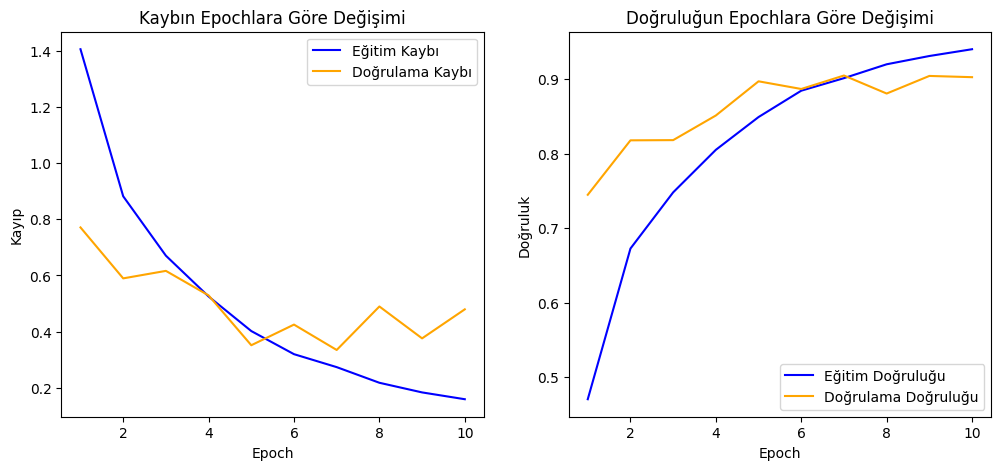

In [23]:
import matplotlib.pyplot as plt

# Eğitim sırasında elde edilen değerler (
history_dict = history.history

# Epoch değerlerini ayırma
epochs = range(1, len(history_dict['loss']) + 1)

# Kaybı ve doğruluğu çizme
plt.figure(figsize=(12, 5))

# Kaybı gösterme
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], label='Eğitim Kaybı', color='blue')
plt.plot(epochs, history_dict['val_loss'], label='Doğrulama Kaybı', color='orange')
plt.title('Kaybın Epochlara Göre Değişimi')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# Doğruluğu gösterme
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], label='Eğitim Doğruluğu', color='blue')
plt.plot(epochs, history_dict['val_accuracy'], label='Doğrulama Doğruluğu', color='orange')
plt.title('Doğruluğun Epochlara Göre Değişimi')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

Grafiklerde eğitim ve doğrulama süreçlerinin kayıp ve doğruluk değişimleri gösteriliyor. Şimdi bunları tek tek inceleyelim:

Sol Grafik: Kayıp Değerlerinin Epochlara Göre Değişimi

	•	Eğitim Kaybı (Mavi Çizgi): Eğitim kaybı epoch sayısı arttıkça sürekli olarak düşüyor. Bu, modelin eğitim verisi üzerindeki hatalarının azaldığını, yani modelin veriyi daha iyi öğrendiğini gösteriyor.

	•	Doğrulama Kaybı (Turuncu Çizgi): Doğrulama kaybı başlangıçta düşse de, belli bir noktadan sonra (yaklaşık 5-6. epoch’ta) dalgalanmaya başlıyor. Özellikle son birkaç epoch’ta yükselme var, bu da modelin doğrulama verisi üzerinde daha fazla hata yapmaya başladığını gösterebilir. Bu durum, overfitting (aşırı öğrenme) belirtisi olabilir; model eğitim verisine çok iyi uyum sağlarken, doğrulama verisinde aynı performansı gösteremiyor.

Sağ Grafik: Doğruluğun Epochlara Göre Değişimi

	•	Eğitim Doğruluğu (Mavi Çizgi): Eğitim doğruluğu sürekli artarak yaklaşık 0.95 seviyesine ulaşıyor. Bu, modelin eğitim verisini başarılı bir şekilde öğrendiğini gösteriyor.
  
	•	Doğrulama Doğruluğu (Turuncu Çizgi): Doğrulama doğruluğu da başlangıçta artıyor ve yaklaşık 6. epoch’a kadar eğitim doğruluğuyla uyumlu ilerliyor. Ancak daha sonra doğrulama doğruluğu sabit kalıyor ve hafif dalgalanmalar gözleniyor. Bu da yine modelin doğrulama verisine aşırı uyum sağlayamaması ve overfitting olabileceğini işaret edebilir.

# Confusion Matrix ve Classification Report ile Model Değerlendirmesi

Bu adımda, modelin doğrulama seti üzerindeki performansını detaylı bir şekilde incelemek için confusion matrix ve classification report oluşturduk. Modelin hangi sınıflarda iyi performans gösterdiğini ve hangi sınıflarda hatalar yaptığını daha net bir şekilde anlamak için bu adımlar uygulandı.

113/113 [==============================] - 167s 1s/step


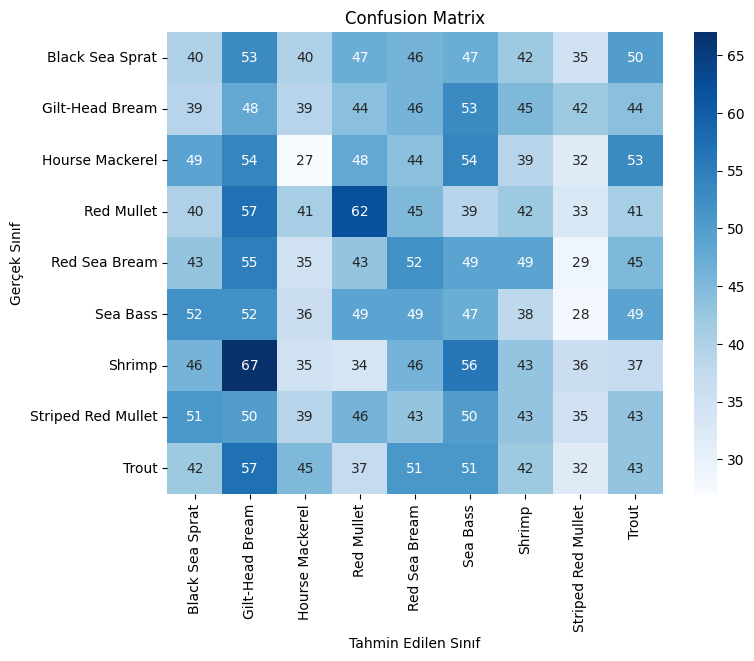

Classification Report:
                     precision    recall  f1-score   support

   Black Sea Sprat       0.10      0.10      0.10       400
   Gilt-Head Bream       0.10      0.12      0.11       400
   Hourse Mackerel       0.08      0.07      0.07       400
        Red Mullet       0.15      0.15      0.15       400
     Red Sea Bream       0.12      0.13      0.13       400
          Sea Bass       0.11      0.12      0.11       400
            Shrimp       0.11      0.11      0.11       400
Striped Red Mullet       0.12      0.09      0.10       400
             Trout       0.11      0.11      0.11       400

          accuracy                           0.11      3600
         macro avg       0.11      0.11      0.11      3600
      weighted avg       0.11      0.11      0.11      3600



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Modelin tahminlerini almak
y_pred = model_cnn.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Tahmin edilen sınıflar

# Gerçek sınıfları almak
y_true = validation_generator.classes  # Doğru etiketler
class_labels = list(validation_generator.class_indices.keys())  # Sınıf isimleri

# Confusion Matrix'i hesaplama
cm = confusion_matrix(y_true, y_pred_classes)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

# Classification Report'u yazdırma
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix Yorumu

Bu confusion matrix, modelin doğrulama setindeki sınıflar üzerindeki performansını gösteriyor. Her bir hücre, modelin bir sınıfa yaptığı tahminin sayısını ve gerçek sınıf ile tahmin edilen sınıf arasındaki ilişkiyi temsil ediyor.


* 	Red Mullet (Kırmızı Barbun) sınıfında model daha başarılı, çünkü çoğunlukla doğru tahminler yapmış (62 doğru tahmin).
* 	Shrimp (Karides) ve House Mackerel (İstavrit) gibi sınıflarda ise diğer sınıflarla karışıklık yaşandığı görülüyor. Özellikle Gilt-Head Bream (Çipura) sınıfıyla sık karışıklık olduğu dikkat çekici.
* 	Sınıflar arasındaki bu karışıklıklar, görsel benzerlikler veya veri setindeki dengesizlikler gibi faktörlerden kaynaklanabilir. Bu durumu iyileştirmek için daha fazla veri, daha derin bir model veya sınıfları ayırt edebilecek ek özellikler kullanılabilir.